In [10]:
import pandas as pd

In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/geniusai-research/interns_task/main/sampled_data2.csv")

In [89]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [17]:
count = data['fraud'].value_counts()
count

0    18000
1     7200
Name: fraud, dtype: int64

In [19]:
data.isnull().sum().sum()

0

In [20]:
data.describe()

,amount,fraud
count,25200.000000,25200.000000
mean,174.212506,0.285714
std,501.116240,0.451763
min,0.000000,0.000000
25%,17.720000,0.000000
50%,36.340000,0.000000
75%,109.180000,1.000000
max,8329.960000,1.000000


In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:>

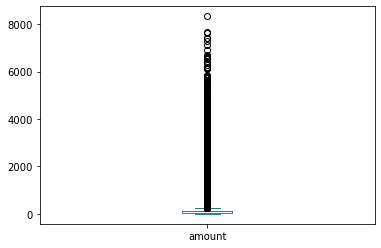

In [21]:
data[['amount']].plot.box()

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
data["amount"] = scaler.fit_transform(data["amount"].values.reshape(-1, 1))

NameError: name 'scaler' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42,stratify=y)

In [36]:
data.nunique()

step          180
customer     4061
age             8
gender          4
merchant       48
category       14
amount      12958
fraud           2
dtype: int64

In [40]:
data["gender"].unique()

array(['Male', 'Female', 'Enterprise', 'Unknown'], dtype=object)

In [44]:
data["age"].unique()

array(['36to45', '26to35', '56to65', '19to25', '46to55', 'gt65',
       'Unknown', 'lt18'], dtype=object)

In [45]:
data["category"].unique()

array(['Transportation', 'Beauty&Wellness', 'Sports&Toys', 'Health',
       'Leisure', 'Groceries', 'HotelServices', 'Fashion', 'Travel',
       'OtherServices', 'Technology', 'Restaurants&Bars', 'Home',
       'Contents'], dtype=object)

In [46]:
data1 = data[data.gender != "Enterprise"]

In [90]:
data1.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [49]:
count = data1['fraud'].value_counts()
count

0    17968
1     7193
Name: fraud, dtype: int64

In [52]:
data1.describe()

,amount,fraud
count,25161.000000,25161.000000
mean,174.314782,0.285879
std,501.424453,0.451841
min,0.000000,0.000000
25%,17.740000,0.000000
50%,36.340000,0.000000
75%,109.500000,1.000000
max,8329.960000,1.000000


In [53]:
data1.nunique()

step          180
customer     4052
age             7
gender          3
merchant       48
category       14
amount      12946
fraud           2
dtype: int64

In [54]:
corr = data.corr()

In [57]:
corr

,amount,fraud
amount,1.000000,0.450215
fraud,0.450215,1.000000


In [55]:
import seaborn as sns

<AxesSubplot:>

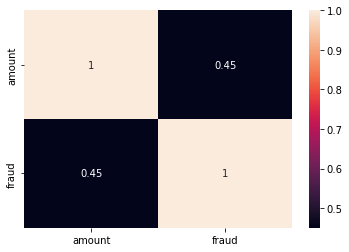

In [58]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

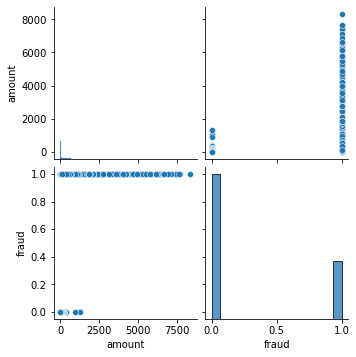

In [59]:
sns.pairplot(data)

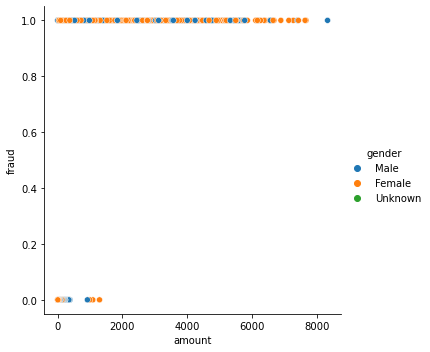

In [64]:
sns.relplot(x="amount", y="fraud", hue = "gender", data = data1)

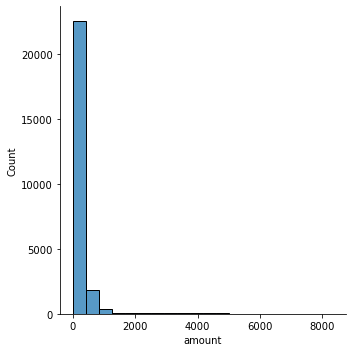

In [68]:
sns.displot(data1["amount"], bins = 20)

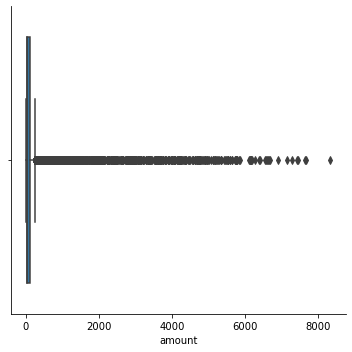

In [70]:
sns.catplot(x = "amount", kind="box", data=data1)

In [71]:
entity_column = 'customer'
target_column= 'fraud'
datetime_columns = 'step'

In [73]:
if entity_column == '':
    data1['entity_column']= data1.index.tolist()
    entity_column = 'entity_column' 
    
if datetime_columns == '':
    data1['datetime_columns']= data1.index.tolist()    
    datetime_columns = 'datetime_columns'

numerical_columns = data1._get_numeric_data().columns.values.tolist()
print(numerical_columns)

['amount', 'fraud']


In [75]:
X = data1.drop(columns=[entity_column,target_column,datetime_columns])
y = data1[target_column]

In [77]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding of Categorical Columns
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42,stratify=y)

rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)

In [85]:
from sklearn.metrics import roc_auc_score
if data1[target_column].nunique()> 2:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

0.9954911088975396


In [87]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

[[13191   285]
 [  288  5107]]


<AxesSubplot:>

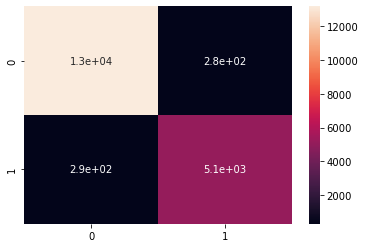

In [88]:
sns.heatmap(cf_matrix, annot=True)